In [1]:
# Importation des bibliothèques 
import geopandas as gpd
import rasterstats
import pandas as pd
from rasterstats import zonal_stats
import os 
from osgeo import gdal
import numpy as np
from collections import defaultdict
from my_function import apply_decision_rules, compute_confusion_matrix_with_plots

In [2]:
# Définition des cheminss d'accès 
my_folder = '/home/onyxia/work/Depot_Git/results/data'
sample_filename = os.path.join(my_folder, 'sample/Sample_BD_foret_T31TCJ.shp')
image_filename = os.path.join (my_folder,'classif/carte_essences_echelle_pixel.tif')

In [3]:
# Utilisation de zonal_stats pour obtenir le total des pixels par polygone
zonal_statistics = zonal_stats(
    sample_filename,
    image_filename,
    stats=["count"],  # Nombre total de pixels par polygone
    categorical=True  # Activer le mode catégoriel pour extraire les classes
)

# Chargement de raster pour extraire les classes
raster = gdal.Open(image_filename)
band = raster.GetRasterBand(1)  
raster_data = band.ReadAsArray()

# Boucle pour extraire les classes par polygone
# liste de dictionnaires pour stocker les pourcentages des classes par polygone
polygon_classes_percentages = []

# Parcourir les statistiques zonales
for idx, stats in enumerate(zonal_statistics):
    polygon_id = idx + 1  
    total_pixels = stats["count"]  # Nombre total de pixels dans le polygone

    # Initialisation d'un dictionnaire pour stocker les pourcentages des classes pour ce polygone
    class_percentages = {}
    
    # Parcourir chaque classe dans le polygone
    for class_value, pixel_count in stats.items():
        if class_value == "count":  # Ignorer le total
            continue
        
        # Calcul du pourcentage
        percentage = (pixel_count / total_pixels) * 100
        class_percentages[class_value] = percentage

    #  Ajout de résultats pour ce polygone
    polygon_classes_percentages.append({
        "polygon_id": polygon_id,
        "class_percentages": class_percentages
    })

# Affichage des résultats
for polygon_result in polygon_classes_percentages:
    print(f"Polygone {polygon_result['polygon_id']} :")
    for class_value, percentage in polygon_result["class_percentages"].items():
        print(f"  Classe {class_value}: {percentage:.2f}%")
        
# Transformation de resulats sous forme d'un dataframe pour qu'elle soit utilisée par la suite dans la fonction d'arbre de décision 
df_polygon_classes_percentages= pd.DataFrame(polygon_classes_percentages)
df_polygon_classes_percentages.head(5)

/opt/conda/lib/python3.12/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Polygone 1 :
Polygone 2 :
  Classe 12: 100.00%
Polygone 3 :
  Classe 12: 99.65%
  Classe 13: 0.17%
  Classe 14: 0.17%
Polygone 4 :
  Classe 12: 100.00%
Polygone 5 :
  Classe 12: 100.00%
Polygone 6 :
  Classe 12: 99.93%
  Classe 13: 0.07%
Polygone 7 :
  Classe 11: 7.06%
  Classe 12: 92.86%
  Classe 14: 0.08%
Polygone 8 :
  Classe 12: 100.00%
Polygone 9 :
  Classe 11: 2.70%
  Classe 12: 96.53%
  Classe 24: 0.77%
Polygone 10 :
  Classe 12: 100.00%
Polygone 11 :
  Classe 12: 100.00%
Polygone 12 :
  Classe 12: 100.00%
Polygone 13 :
  Classe 12: 100.00%
Polygone 14 :
  Classe 12: 98.10%
  Classe 14: 1.90%
Polygone 15 :
  Classe 14: 100.00%
Polygone 16 :
  Classe 12: 100.00%
Polygone 17 :
  Classe 12: 100.00%
Polygone 18 :
  Classe 12: 100.00%
Polygone 19 :
  Classe 12: 100.00%
Polygone 20 :
  Classe 12: 100.00%
Polygone 21 :
  Classe 12: 100.00%
Polygone 22 :
  Classe 12: 100.00%
Polygone 23 :
  Classe 12: 100.00%
Polygone 24 :
  Classe 12: 100.00%
Polygone 25 :
  Classe 12: 100.00%
Polygone

,polygon_id,class_percentages
0,1,{}
1,2,{12: 100.0}
2,3,"{12: 99.65377957299481, 13: 0.1731102135025966..."
3,4,{12: 100.0}
4,5,{12: 100.0}


In [4]:
# Ajout des classifications prédites selon les règles de décision
polygons = gpd.read_file (sample_filename)
polygons["codepredit"] = apply_decision_rules(df_polygon_classes_percentages, sample_filename)
polygons.head(5)

# Sauvegarder les données avec la nouvelle colonne
output_path_samples = os.path.join (my_folder, "classif/carte_essences_echelle_peuplement.shp")  # Remplacez par le chemin de sortie
polygons.to_file(output_path_samples)

                                              Nom  \
0                               Feuillus_en_ilots   
1                               Feuillus_en_ilots   
2                             Melange_de_feuillus   
3                               Feuillus_en_ilots   
4                             Melange_de_feuillus   
5                             Melange_de_feuillus   
6  Melange_de_coniferes_preponderants_et_feuillus   
7                                           Chene   
8  Melange_de_feuillus_preponderants_et_coniferes   
9                                           Chene   

                                       codepredit  
0  Melange_de_feuillus_preponderants_et_coniferes  
1  Melange_de_feuillus_preponderants_et_coniferes  
2  Melange_de_feuillus_preponderants_et_coniferes  
3  Melange_de_feuillus_preponderants_et_coniferes  
4  Melange_de_feuillus_preponderants_et_coniferes  
5  Melange_de_feuillus_preponderants_et_coniferes  
6  Melange_de_feuillus_preponderants_et_coniferes  


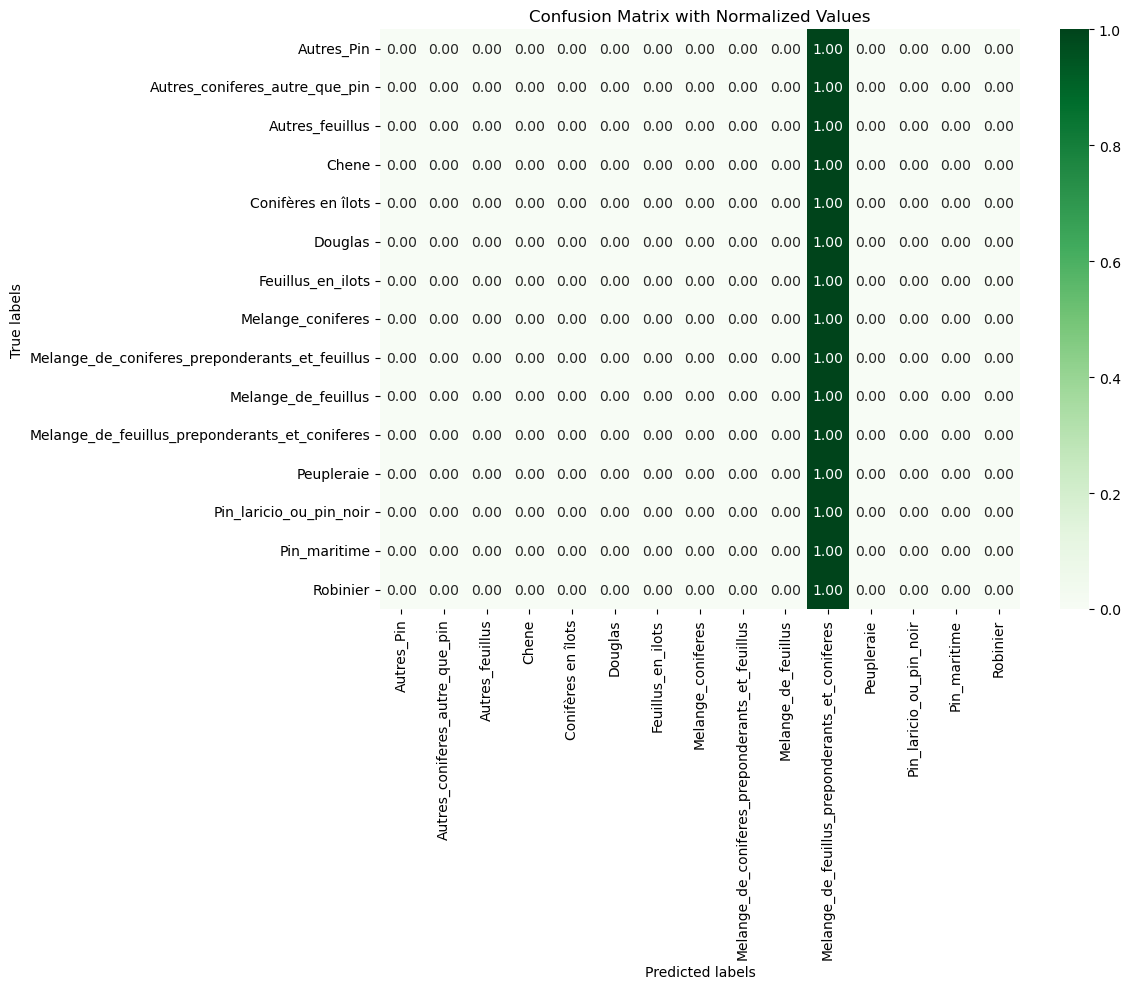

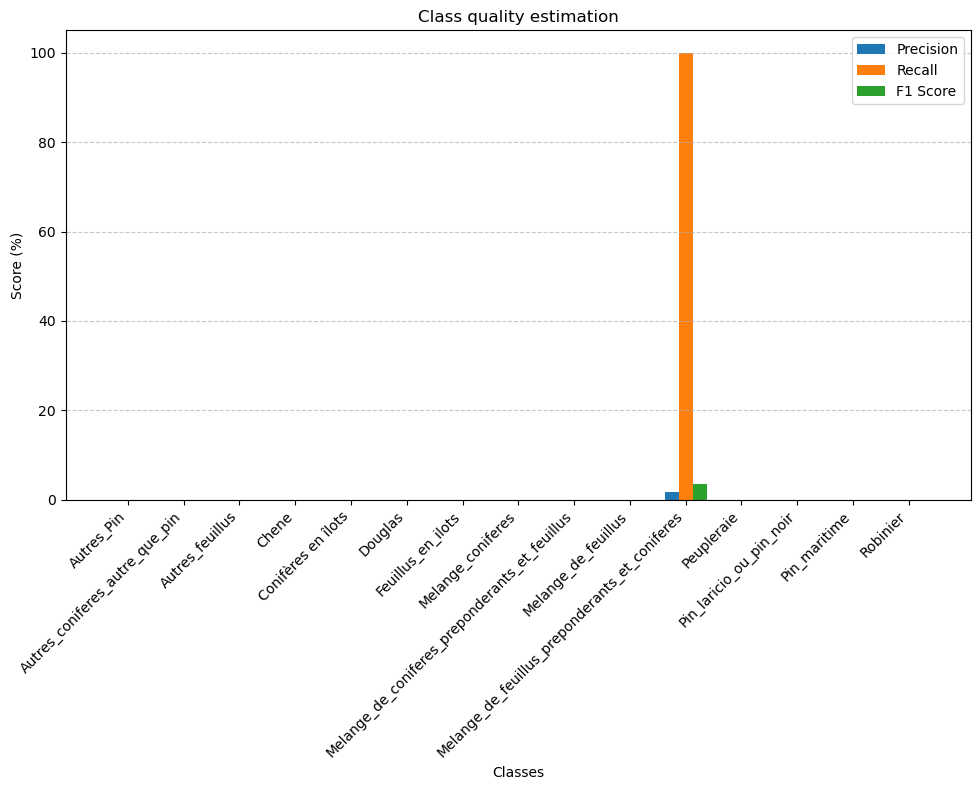

{'confusion_matrix': array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    8,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  128,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2172,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   39,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   18,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 5325,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   19,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  119,
           0,    0,    0,    0],
       [   0,   

In [5]:
# Calcul de  la matrice de confusion
confusion_matrix = compute_confusion_matrix_with_plots(polygons,"Nom","codepredit")
print(confusion_matrix)